In [1]:
punlearn centroid_map
plist centroid_map



Parameters for /home/kjg/cxcds_param4/centroid_map.par

        infile =                  Input counts image
       outfile =                  Output map file
      (numiter = 1)               Number of centroid iterations
     (sitefile = )                Input initial site locations
      (verbose = 1)               Tool chatter level
      (clobber = yes)             Remove outfile if it already exists?
         (mode = ql)              



In [2]:
centroid_map abell665.flux.asm \
   centroid.map numiter=20 clob+

centroid_map
          infile = abell665.flux.asm
         outfile = centroid.map
         numiter = 20
        sitefile = 
         verbose = 1
         clobber = yes
            mode = ql



In [3]:
dmmaskbin abell665.flux.asm centroid.map centroid.img clob+

In [4]:
###map2reg centroid.map centroid.reg clob+
dmimggrad centroid.map centroid.grad sobel mag clob+

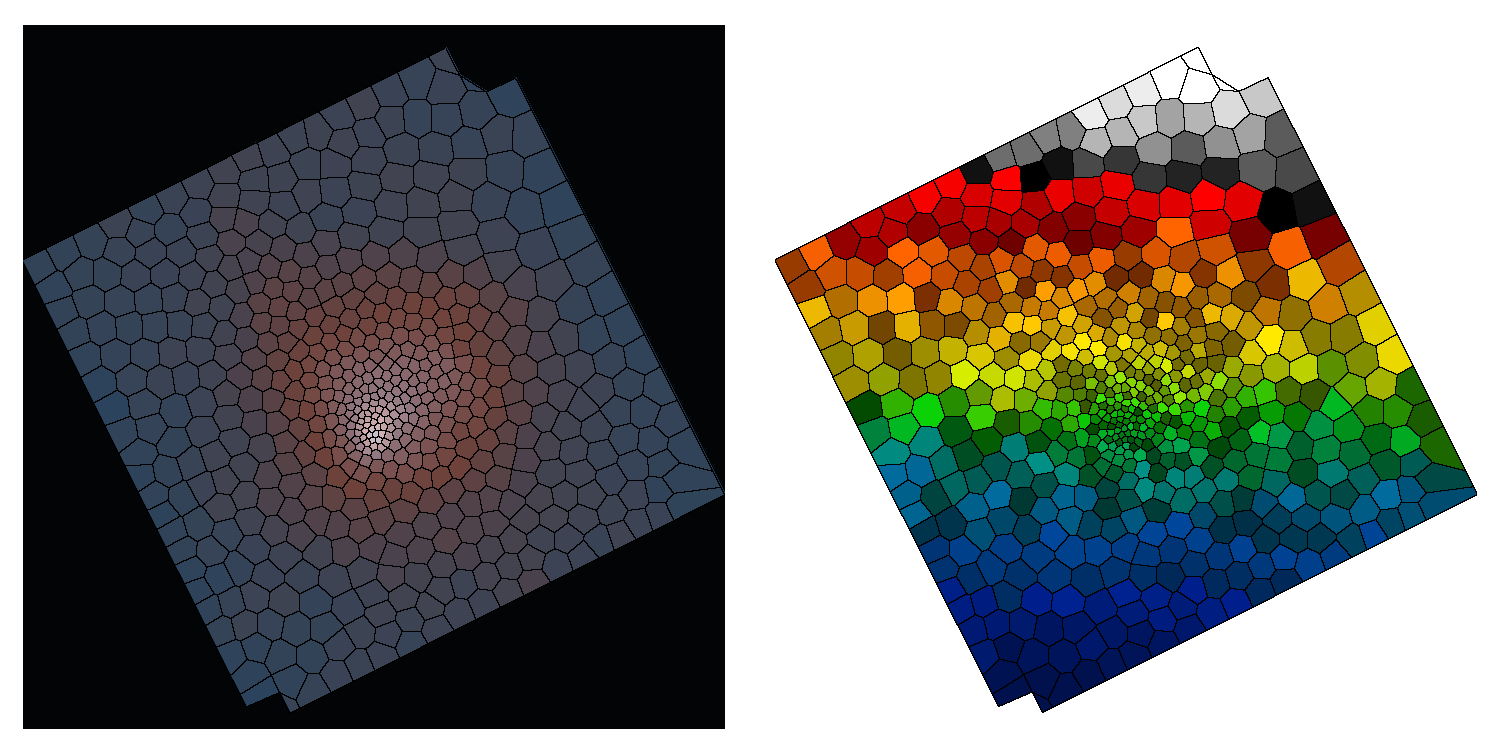

In [5]:
ds9 -geometry 1500x800 centroid.img -scale log -block to 2 -scale limits 0 2e-6 \
    -cmap load sunset-in-atlantis.sao \
    -mask color black -mask centroid.grad -nomask \
    centroid.map -scale linear -scale mode minmax -zoom to 0.5 -block to 1 \
    -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
    -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
    -mask color black -mask centroid.grad -nomask \
    -saveimage png centroid.png -exit

display < centroid.png

In [6]:
plist statmap


Parameters for /home/kjg/cxcds_param4/statmap.par

        infile =                  Input event file
       mapfile =                  Input map file
       outfile =                  Output file name
       (column = energy)          Column name to compute statistics
    (statistic = median)          Which statistic to compute?
      (clobber = no)              Remove output file if it already exists?
      (verbose = 1)               Amount of tool chatter
         (mode = ql)              



In [7]:
python << EOM
import region
import stk
o=region.field()
for r in stk.build("@s.reg"):
   o=o-region.CXCRegion(r)
o.write("exld.reg",fits=True,clobber=True)
EOM

In [8]:
statmap "acisf13201_repro_evt2.fits[energy=500:7000][sky=region(exld.reg)]" centroid.map median_energy.map clob+

statmap
          infile = acisf13201_repro_evt2.fits[energy=500:7000][sky=region(exld.reg)]
         mapfile = centroid.map
         outfile = median_energy.map
          column = energy
       statistic = median
         clobber = yes
         verbose = 1
            mode = ql



In [9]:

#ds9 median_energy.map